In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Conv1D, GRU, Dense, Flatten, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/content/NIFTY_50_combined.csv')

print(df.shape)

In [8]:
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,01-JAN-2020,12202.15,12222.20,12165.30,12182.50,304078039,10445.68
1,02-JAN-2020,12198.55,12289.90,12195.25,12282.20,407697594,15256.55
2,03-JAN-2020,12261.10,12265.60,12191.35,12226.65,428770054,16827.27
3,06-JAN-2020,12170.60,12179.10,11974.20,11993.05,396501419,16869.22
4,07-JAN-2020,12079.10,12152.15,12005.35,12052.95,447818617,17797.68


In [9]:
df.columns = df.columns.str.strip()
closing_prices = df['Close'].tolist()
print("Number of closing prices:", len(closing_prices))
print("First 5 closing prices:", closing_prices[:5])

Number of closing prices: 746
First 5 closing prices: [12182.5, 12282.2, 12226.65, 11993.05, 12052.95]


In [10]:
df['Date'] = pd.to_datetime(df['Date'])
print(df.dtypes)

Date               datetime64[ns]
Open                      float64
High                      float64
Low                       float64
Close                     float64
Shares Traded               int64
Turnover (₹ Cr)           float64
dtype: object


<ipython-input-10-d94819057756>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [11]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

print("Scaled Data:\n", scaled_data)

Scaled Data:
 [[0.32270644]
 [0.3297432 ]
 [0.32582251]
 [0.30933518]
 [0.31356288]
 [0.31161489]
 [0.32506379]
 [0.32795048]
 [0.33308513]
 [0.3353966 ]
 [0.3340556 ]
 [0.33491666]
 [0.33469434]
 [0.3256743 ]
 [0.32181361]
 [0.31737064]
 [0.32255469]
 [0.32734703]
 [0.31822465]
 [0.31376403]
 [0.31896573]
 [0.31235245]
 [0.30715075]
 [0.2859593 ]
 [0.28920948]
 [0.30838941]
 [0.31611785]
 [0.31956213]
 [0.31676718]
 [0.31204895]
 [0.31744122]
 [0.32402627]
 [0.32215239]
 [0.31783293]
 [0.31305824]
 [0.30929636]
 [0.31871164]
 [0.31553204]
 [0.29778487]
 [0.29556162]
 [0.28713444]
 [0.28394426]
 [0.25348574]
 [0.24861576]
 [0.26065307]
 [0.25696177]
 [0.2582322 ]
 [0.23850174]
 [0.20053005]
 [0.20102058]
 [0.13974006]
 [0.16550505]
 [0.11202002]
 [0.09576206]
 [0.0605959 ]
 [0.04610243]
 [0.08012168]
 [0.        ]
 [0.01346654]
 [0.04994195]
 [0.07278143]
 [0.07410832]
 [0.04734816]
 [0.06969711]
 [0.04542134]
 [0.03342285]
 [0.08342126]
 [0.08035459]
 [0.10598548]
 [0.09765359]
 [0.09

In [12]:
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

In [13]:
sequence_length = 10
X, y = create_sequences(scaled_data, sequence_length)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.hshape)
print(y_test.sape)

(588, 10, 1)
(588, 1)
(148, 10, 1)
(148, 1)


## Model

In [53]:
model_GRU = Sequential([

    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    GRU(64, return_sequences=True),
    GRU(32),


    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='linear')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
from tensorflow.keras.optimizers import Adam
model_GRU.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [55]:
history = model_GRU.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.2065 - val_loss: 0.0086
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0272 - val_loss: 0.0031
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0181 - val_loss: 0.0011
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0177 - val_loss: 0.0010
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0172 - val_loss: 0.0011
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0182 - val_loss: 7.0515e-04
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0145 - val_loss: 0.0019
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0153 - val_loss: 0.0042
Epoch 9/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0127 - val_loss: 0.0015
Epoch 10/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0142 - val_loss: 7.6909e-04
Epoch 11/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0138 - val_loss: 7.6253e-04
Epoch 12/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

In [56]:
# Make predictions
y_predictions = model_GRU.predict(X)
y_predictions_rescaled = scaler.inverse_transform(y_predictions)
y_test_rescaled = scaler.inverse_transform(y)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


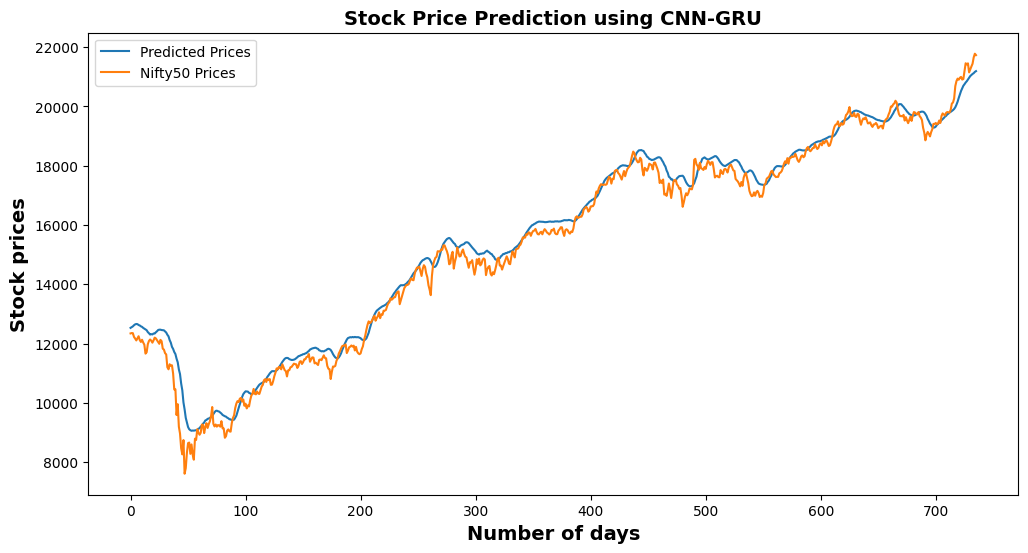

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(y_predictions_rescaled , label="Predicted Prices")
plt.plot(y_test_rescaled, label="Nifty50 Prices")
plt.xlabel("Number of days",fontsize=14,fontweight='bold')
plt.ylabel("Stock prices",fontsize=14,fontweight='bold')
plt.title("Stock Price Prediction using CNN-GRU",fontsize=14,fontweight='bold')
plt.legend()
plt.show()

In [58]:
train_loss = model_GRU.evaluate(X_train, y_train, verbose=0)
test_loss = model_GRU.evaluate(X_test, y_test, verbose=0)
print(f"Train Loss: {train_loss}, Test Loss: {test_loss}")

Train Loss: 0.0009178034961223602, Test Loss: 0.000818534754216671


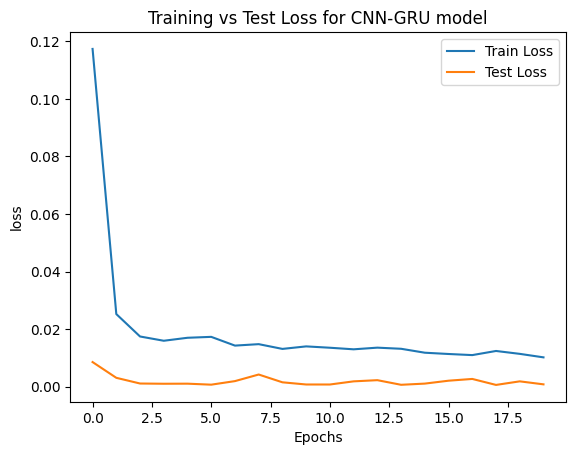

In [59]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Training vs Test Loss for CNN-GRU model')
plt.show()

In [60]:
mae = mean_absolute_error(y,y_predictions)
mse = mean_squared_error(y, y_predictions)
r2 = r2_score(y, y_predictions)


print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 0.022165029256758985
Mean Squared Error (MSE): 0.0008978419051276456
R-squared (R²): 0.9848365167120584
